### CODING CONVENTION
 
	NAMING
	T = Test-collection  
	M = Measure  
	Q = Query  
	S = Score
	A = Algorithm (that which is usually 'system')
 
	VARIABLE PREFIX
	v = vector
	l = list
	m = matrix
	a = array
	s = string (should be 'c' as in 'character' for R?)
	d = data frame
	w/l = wide/long table format
	f = file name (then what is a string?)

### DATA

* This notebook is a part of a MS Visual Studio 'solution' (collection of projects)
* The Github repository is: [IREval](https://github.com/gechobajar/IREval).
* A download link at the top right of the rendering of this notebook in NBViewer will fetch the notebook itself: a file named _xcollection.ipynb_.
* Clone the Github repository to get the data directory _IREval/xcollection/data_, where the eval files used by the R code are to be found.
* In other words, you could only get the _data_ directory from Github and make sure its in the same directory as _xcollection.ipynb_. The notebook code points to eval files using at a path: _data/xyz_. 



In [45]:
library("reshape2")
library("ggplot2")

# Functions:

# Build the Measure x Query x Score Matrix
#  - Convert long-format table to wide-format table.
#  - Use col 1 as row names and then drop it.
#  - Create matrix from table

MQSMatrix <- function(fEval) {
    vEvalHeader = c("measure", "query", "score")
    dlMQS = read.table(fEval, header = FALSE, col.names = vEvalHeader, na.strings = c("runid", "all"))
    dlMQS = na.omit(dlMQS)
    dwMQS = dcast(dlMQS, measure ~ query, value.var = "score")
    rownames(dwMQS) = dwMQS[, 1]
    dwMQS = dwMQS[, -1]
    mMQS = data.matrix(dwMQS)
    return(mMQS)
}

# Build the Algorithm x Query x Score matrix

AQSMatrix <- function(vfEval) {
    lmEval = lapply(vfEval, function(x) MQSMatrix(x))
    lmAQS = lapply(lmEval, function(z) z["map",])
    vAName = basename(vfEval)
    vQName = names(lmAQS[[1]])
    mAQS = matrix(unlist(lmAQS), nrow = length(vfEval), byrow = T, dimnames = list(vAName, vQName))
    return(mAQS)
}

# Get list of eval files whose names match a regex.

getEvalFileList <- function(regex) {
    vfEval = list.files("data/LTR/evals", pattern = regex, full.names = TRUE)
}

### DEMO

The overall transformation steps:
* Read TRECEVAL output files.
* Convert each file to a MQS matrix.
* Create a list of AQS matrices, one each for a test-collection, from a set of MQS matrices.


#### Derive mMQS: Measure x Query x Score matrix


                             1         2         3         4         5
bpref                   0.1588    0.1810    0.1757    0.2439    0.5669
iprec_at_recall_0.00    0.1585    0.5000    0.5000    0.6667    1.0000
iprec_at_recall_0.10    0.1585    0.0815    0.2571    0.6250    0.2308
iprec_at_recall_0.20    0.1057    0.0483    0.1866    0.4500    0.1698
iprec_at_recall_0.30    0.0663    0.0000    0.1866    0.1489    0.1290
iprec_at_recall_0.40    0.0000    0.0000    0.1439    0.0455    0.0474
iprec_at_recall_0.50    0.0000    0.0000    0.1439    0.0429    0.0474
iprec_at_recall_0.60    0.0000    0.0000    0.1056    0.0429    0.0385
iprec_at_recall_0.70    0.0000    0.0000    0.0843    0.0420    0.0000
iprec_at_recall_0.80    0.0000    0.0000    0.0609    0.0000    0.0000
iprec_at_recall_0.90    0.0000    0.0000    0.0000    0.0000    0.0000
iprec_at_recall_1.00    0.0000    0.0000    0.0000    0.0000    0.0000
map                     0.0367    0.0256    0.1286    0.1624    0.0906
num_re

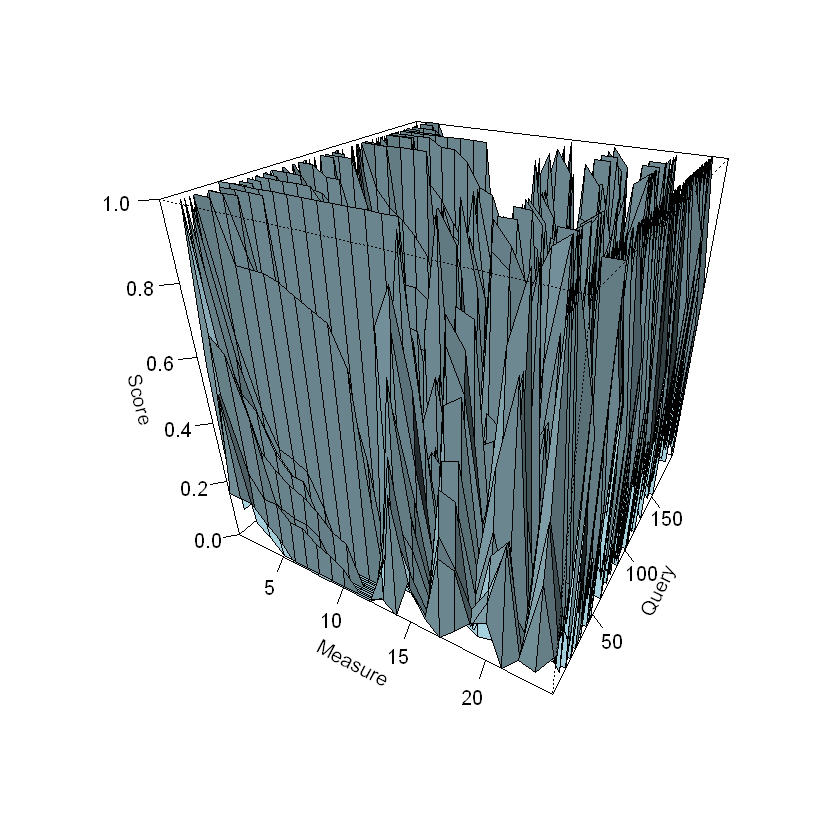

In [46]:
fEval = "data/LTR/evals/AP.d.p.bm25.196.T.x"
mMQS = MQSMatrix(fEval)
print(mMQS[,1:5])

# Just for fun: plot the mMQS matrix (the plot makes no real sense).
# Rows 14, 15 and 16(num_rel, num_rel_ret, num_ret) were dropped to keep scores within a range that creates a decent picture.
mMQS = mMQS[ - c(14, 15, 16),]
 persp(x = 1:nrow(mMQS), y = 1:ncol(mMQS), z = mMQS, xlab = "Measure", ylab = "Query", zlab = "Score", theta = 30, phi = 30, col = "lightblue", shade = 0.25, ticktype = "detailed")

#### Derive mAQS: Algorithm x Query x Measure matrix

In [47]:
vTName = c("AP", "DOE", "FR")
lTIndex = setNames(as.list(1:length(vTName)), vTName)
vfEvalRgx = paste("^", vTName, "\\.", sep = "")
lmAQS = lapply(vfEvalRgx, function(x) {y = getEvalFileList(x); AQSMatrix(y)})

# Part of a matrix from lmAQS for the AP and DOE test-collection.
print(lmAQS[[lTIndex[["AP"]]]][, 1:5])
print(lmAQS[[lTIndex[["DOE"]]]][, 1:5])

                                 1      2      3      4      5
AP.d.p.bm25.196.T.x         0.0367 0.0256 0.1286 0.1624 0.0906
AP.d.p.bm25e.196.T.x        0.0317 0.0256 0.1289 0.1626 0.0934
AP.d.p.bm25L.196.T.x        0.0442 0.0144 0.1176 0.1925 0.0937
AP.d.p.defaultL.196.T.x     0.0358 0.0094 0.1119 0.1356 0.1007
AP.d.p.dfrL.196.T.x         0.0393 0.0146 0.1159 0.2073 0.0810
AP.d.p.lmdirichletL.196.T.x 0.0474 0.0221 0.1283 0.1590 0.0697
AP.d.x.bm25.196.T.x         0.0282 0.0269 0.0385 0.0726 0.1224
AP.d.x.bm25e.196.T.x        0.0230 0.0269 0.0384 0.0726 0.1224
AP.d.x.bm25L.196.T.x        0.0357 0.0123 0.0351 0.1127 0.1449
AP.d.x.defaultL.196.T.x     0.0252 0.0109 0.0291 0.0561 0.1458
AP.d.x.dfrL.196.T.x         0.0275 0.0124 0.0376 0.1044 0.1393
AP.d.x.lmdirichletL.196.T.x 0.0390 0.0213 0.0315 0.0758 0.1387
                                 3      7     8     11     12
DOE.d.p.bm25.80.T.x         1.0000 0.0119 0e+00 0.0098 0.0609
DOE.d.p.bm25e.80.T.x        1.0000 0.0119 0e+00 0.0055 0.

#### Derive mATS: Algorithm x Test-collection x Score matrix

* Scores are Mean-scores (MAP, in this case) from each matrix in lmAQS, for all test-collections
* Followed by a plot.

     d.p.bm25 d.p.bm25e d.p.bm25L d.p.defaultL  d.p.dfrL
AP  0.2195990 0.2094714 0.2247745     0.216199 0.2215148
DOE 0.1728263 0.1818350 0.1477962     0.146970 0.1449250
FR  0.2013282 0.1998427 0.1910736     0.182650 0.1436773


Using Algorithm as id variables


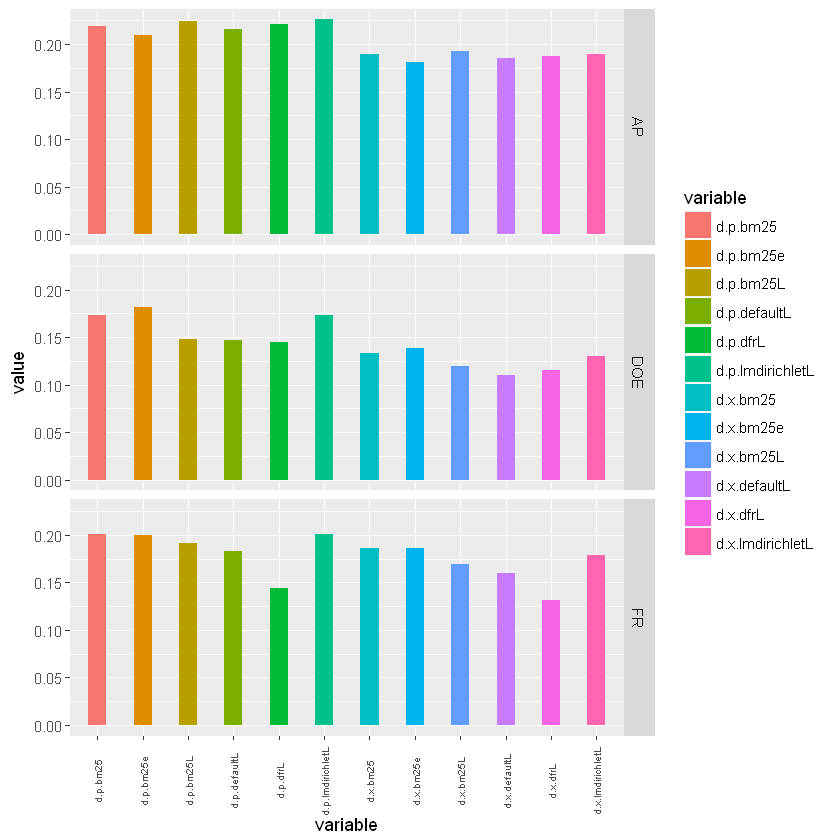

In [48]:
# Chris's table: Algorithm x Testcol x Mean Score
lvRowMean = lapply(vTName, function(x) rowMeans(lmAQS[[lTIndex[[x]]]]))
vColName = rownames(lmAQS[[lTIndex[[1]]]])
vAName = sapply(strsplit(vColName, "[.]"), function(x) paste(x[2:4], collapse = "."))
mATS = matrix(unlist(lvRowMean), nrow = length(vTName), byrow = T, dimnames = list(vTName, vAName))
print(mATS[, 1:5])

# Plot mATS
dATS = data.frame(mATS)
dATS[, "Algorithm"] = rownames(dATS)
dlATS = melt(dATS)
ggplot(dlATS, aes(variable, value, fill = variable)) + geom_bar(width = 0.4, stat = "identity") + facet_grid(Algorithm ~ .) + theme(strip.text.x = element_text(size = 8, angle = 90), axis.text.x = element_text(angle = 90, vjust = 0.5, size = 6))